In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_score
from sklearn.calibration import CalibratedClassifierCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ImportError: cannot import name 'roc_score' from 'sklearn.metrics' (/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [2]:
!ls /kaggle/input/ecml-pkdd-2007-csv

xml_test.csv  xml_train.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/ecml-pkdd-2007-csv/xml_train.csv", sep='\t')
df_test = pd.read_csv("/kaggle/input/ecml-pkdd-2007-csv/xml_test.csv", sep='\t', error_bad_lines=False)

b'Skipping line 5312: expected 42 fields, saw 61\nSkipping line 8526: expected 42 fields, saw 61\nSkipping line 8708: expected 42 fields, saw 61\n'
b'Skipping line 16405: expected 42 fields, saw 61\nSkipping line 20330: expected 42 fields, saw 61\n'


In [4]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('train data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

train data set has got 24504 rows and 42 columns
train data set has got 25598 rows and 42 columns


In [5]:
df = df_train.append(df_test)

In [6]:
classes = ["Valid", "XSS", "SqlInjection", "LdapInjection", "XPathInjection", "PathTransversal", 
          "OsCommanding", "SSI"]

In [7]:
def _classEncoder(class_label):
    return classes.index(class_label)

In [8]:
df1 = df.copy()
df1['class']=df1['class'].apply(_classEncoder)

In [9]:
X=df1.drop(['class'], axis=1)
y=df1['class']

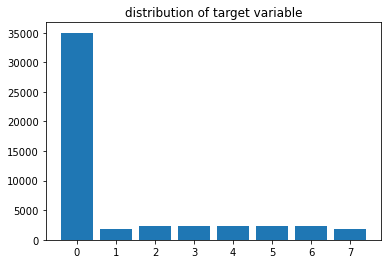

In [10]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([i for i in range(len(classes))])
plt.title('distribution of target variable')
plt.show()

In [11]:
print('total data set has got {} rows and {} columns'.format(df.shape[0], df.shape[1]))

total data set has got 50102 rows and 42 columns


Classes: lists the different subdivision levels of HTTP query categorization ( and how they are represented in the context part of the dataset ).

The "type" element indicate which class this request belongs to :
Normal query ( Valid )
Cross-Site Scripting ( XSS )
SQL Injection ( SqlInjection )
LDAP Injection ( LdapInjection )
XPATH Injection ( XPathInjection )
Path traversal ( PathTransversal )
Command execution ( OsCommanding )
SSI attacks ( SSI )



In [12]:
classes = ["Valid", "XSS", "SqlInjection", "LdapInjection", "XPathInjection", "PathTransversal", 
          "OsCommanding", "SSI"]

In [13]:
df_classes = {}
for c in classes:
    df_temp = df[df['class'].isin([c])]
    print(c, ' attack has got {} rows'.format(df_temp.shape[0]))

    df_classes[c] = df_temp

Valid  attack has got 35003 rows
XSS  attack has got 1824 rows
SqlInjection  attack has got 2274 rows
LdapInjection  attack has got 2274 rows
XPathInjection  attack has got 2279 rows
PathTransversal  attack has got 2293 rows
OsCommanding  attack has got 2302 rows
SSI  attack has got 1853 rows


In [14]:
def Train_Test_Split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.35, stratify=y)
    print("y_train - ", Counter(y_train))
    print("X_train - ", type(X_train))
    print("y_train - ", type(y_train))
    print("y_test - ", Counter(y_test))
    return X_train, X_test, y_train, y_test

In [15]:
dict_df_train = {}
dict_df_test = {}
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for c in classes:
    df_temp = df_classes[c]
    
    #shuffling before splitting
    df_temp = df_temp.sample(frac=1).reset_index(drop=True)
    partition = int(0.65 * df_temp.shape[0])
    
    dict_df_train[c] = df_temp[:partition]
    dict_df_test[c] = df_temp[partition:]
    
    df_train = df_train.append(dict_df_train[c])
    df_test = df_test.append(dict_df_test[c])
    
    print(c, ' train attack has got {} rows'.format(dict_df_train[c].shape[0]))
    print(c, ' test attack has got {} rows'.format(dict_df_test[c].shape[0]))
    
#     X1 = df_temp.drop(['class'],axis=1)
#     y1 = df_temp['class']
#     X_train1, X_test1, y_train1, y_test1 = Train_Test_Split(X1, y1)
    
#     dict_df_x[c] = [X_train1, X_test1]
#     dict_df_y[c] = [y_train1, y_test1]


Valid  train attack has got 22751 rows
Valid  test attack has got 12252 rows
XSS  train attack has got 1185 rows
XSS  test attack has got 639 rows
SqlInjection  train attack has got 1478 rows
SqlInjection  test attack has got 796 rows
LdapInjection  train attack has got 1478 rows
LdapInjection  test attack has got 796 rows
XPathInjection  train attack has got 1481 rows
XPathInjection  test attack has got 798 rows
PathTransversal  train attack has got 1490 rows
PathTransversal  test attack has got 803 rows
OsCommanding  train attack has got 1496 rows
OsCommanding  test attack has got 806 rows
SSI  train attack has got 1204 rows
SSI  test attack has got 649 rows


In [16]:
print('df_train attack has got {} rows'.format(df_train.shape[0]))
print('df_test attack has got {} rows'.format(df_test.shape[0]))

df_train attack has got 32563 rows
df_test attack has got 17539 rows


In [17]:
#shuffling the df_train and df_test
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [18]:
df_train.head()

,class,Host,Connection,Accept,Accept-Charset,Accept-Encoding,Accept-Language,Cache-Control,Client-ip,Cookie,...,UA-OS,UA-Color,UA-Pixels,Via,Transfer-Encoding,Upgrade,Warning,X-Forwarded-For,X-Serial-Number,path
0,Valid,110.174.134.202,keep-alive,*/*;q=0.5,"euc-cn;q=0.5, x-mac-japanese;q=0.0, x-mac-kore...",NaN,"T18l-g4rtg;q=0.2, lci2-lmii, zet-ynth",no-transform,53.27.195.117,traeDxttdn4butn=vMt,...,FreeBSD,color16,4914x5963,o6Md/3.2 4.192.7.30,gzip,"uqn7/3.0, adaoI/9.1, aossv/2.2, skt5nb/9.3","087 www.lusFn.tiff ""cRn1mwq""",6.180.151.78,17174419292129745419,GET /G1nperlb/hzCOJ/cMiCAf5tjY5qPA/pw2hSenuooG...
1,PathTransversal,21.121.20.218,btmb0o,*/*,iso-8859-1,gzip;q=0.7,file,min-fresh=3820,95.91.76.121,kdr5gM4mAfpogsh=391450525;tl=lo3r7DeT;ptOatts=...,...,FreeBSD,NaN,NaN,6.4 225.28.156.119,NaN,NaN,NaN,NaN,NaN,GET /akdrop63FL09vENuDy/oC18MHLCaESPrqnFMbAo/2...
2,Valid,181.16.55.247,keep-alive,"application/*, text/plain;q=0.6","iso-8859-5;q=0.1, x-mac-chinesesimp;q=0.0, big...",*,"4-ye3utsa, isiEamnE-5iei;q=0.4, oaommi-xe;q=0....",only-if-cached,75.52.136.223,eZshcn=99;iIuC8sE=jWpdu,...,Win98,color32,656x086,"8.2 www.ndea5o.jpg, FTP/4.4 www.t0rXm.shtml",identity,"ueemt/7.4, bah/0.8, rta/2.0, rbaf/1.3, siueo/2.5","352 176.101.245.85 ""VhmtzhedooeenorYir"" ""Tue, ...",145.80.124.77,618402796,GET /6oanSre7s4sg2e/r1CanTD.swf?eohthm=eosh&se...
3,XSS,98.229.88.165,iieonsS,*/*,*;q=0.8,"gzip;q=0.1, identity;q=0.4, deflate","utobey-3, eutthet-ion1e, me4noou-uwtit, tD-agc...",max-stale=18078,188.124.236.19,octrfEElophoih=670;inziylo=uEiN;letsej6eee=2Na...,...,Mac OS X,color16,5306x1733,"0.4 www.acty.css, HTTP/1.8 7.17.142.252, 4.4 w...",identity,"ddnzgk/3.0, pnnt/9.2, eehf/9.2",318 www.lawraii.gif,151.1.251.143,126620,GET /eses1i/vMEN5T5AX3bCs/amjhiqZ1zYrgy.mdb?et...
4,Valid,www.feart.com,close,"text/*;q=0.4, video/quicktime, image/*;q=0.3",*,*,"tee-se3, n-luonb, rsl-sda",no-cache,126.177.121.250,Wzm=491;yeredtE5e4=daot|l;ini1ssgrssg5Tgr=t2na...,...,Win98,color8,9593x7407,"4.7 44.129.0.125, tii/0.4 106.152.64.194, 8.3 ...",gzip,"ebeeeA/4.0, bnny5a/4.5, hdfrAb/1.2","817 93.133.40.203 ""t2ar7ldre""",102.149.83.187,686350212460,GET /eauioT/u-SQcC4BTK/iqkZMbwVICDXPA/7e9aAyem...


In [19]:
df_test.head()

,class,Host,Connection,Accept,Accept-Charset,Accept-Encoding,Accept-Language,Cache-Control,Client-ip,Cookie,...,UA-OS,UA-Color,UA-Pixels,Via,Transfer-Encoding,Upgrade,Warning,X-Forwarded-For,X-Serial-Number,path
0,Valid,93.122.135.211,mazriX,*/*;q=0.9,*;q=0.5,"identity;q=0.5, compress;q=0.8","sNahhnfu-jk5, dpmw-o9, hAtnren-cing;q=0.8, d5-...",min-fresh=18061,148.77.109.208,nenw=27;ee0=9HLf1358oK;rfo1otnma=6Ccxx3G-Tk;un...,...,FreeBSD,color16,2101x785,2Pd/5.1 www.a32erlo.jpg,deflate,"6stde/0.3, ewtMfk/8.5, rt9eT5/1.5, nSTo/9.3",231 205.9.41.94,178.187.50.135,507745328384064,PUT /td6weuAOfDwLDndqz/sdde/Een1orf/riP@e9samN...
1,Valid,146.161.92.101,igec,"image/*, application/*, application/zip","cp-932;q=0.2, x-mac-roman;q=0.8, windows-1254;...",NaN,"Thx-dgeI;q=0.3, eItha-he",no-cache,96.157.124.29,ivwbnNb=p5uimopens,...,Solaris,color16,2740x572,2.7 45.33.67.29,identity,"0ss/3.7, rol/6.4, t7a/3.1, oeOo/5.0, iui/8.8",600 www.oeyQ.gif,64.19.200.199,73155166220455300,PUT /webeeeelTlegoocse/8YpasswdJUPs-bqSEKo2/f....
2,Valid,www.aleSLeez5e.fr,close,"audio/*, text/*, application/x-tar","x-mac-chinesetrad;q=0.6, iso-8859-3, gb2312","deflate, identity, identity;q=0.6",tgbnos-jm,no-store,209.144.241.44,erhiJlxnvNvkaD=25496;etxD5h8FlaeaQm=76456;ynot...,...,Win9x,color32,713x311,5.5 162.61.248.36,gzip,"hermne/8.2, rtea/6.7, TesMw/7.3, sTw1mc/8.9, Y...","786 239.89.200.109 ""camctrmexIt1"" ""Wed, 19 May...",39.67.73.35,62509497376132928,GET /asGv/Asfceortela0zjRto.jpg?c-bURdbb=jr&bo...
3,Valid,14.50.24.181,close,*/*,"x-mac-korean, x-mac-cyrillic;q=0.6, x-mac-turk...",*;q=0.0,"mlo6L-oOe;q=0.3, t-ieT;q=0.6, e-aety7e1;q=0.2,...",no-store,32.51.86.160,wetite=9,...,Windows 98,color8,599x133,5.0 58.159.6.220,compress,"lwl/7.6, pratqs/7.3","376 www.ycezutrm.jpg ""nens"" ""Mon, 03 Mar 08 23",59.247.137.64,05592727151,GET /dMFaaJH/rseynma0e/.ptVqyAD/whereGgsanode0...
4,Valid,www.nNee.be,close,*/*;q=0.5,*,"deflate;q=0.4, compress;q=0.5, deflate, compre...",*;q=0.0,only-if-cached,93.241.118.177,Rhas2=e servicesn;30DinputtJboot.ini=r]Es?;omb...,...,Win9x,NaN,NaN,nir9/4.4 www.3eta.gif,deflate,NaN,"832 www.ehihKame.gif ""khIC0""",246.11.40.158,NaN,PUT /0y8LNMMVT3nKz0KO/1da/u1xyxeRYAIR/ebsc8nae...


In [20]:
RandomForestClassifier(max_depth=2, random_state=0)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
vectorizer = TfidfVectorizer(max_df=0.5)

In [22]:
def to_str(X):
    count=0
    X_str=[]
    for index, row in X.iterrows():
        temp=""
        for c in X.columns:
            temp = temp + ' ' + str(row[c])
        X_str.append(temp)
#         if count<10:
# #             print('index; ', index)
#             count+=1
#             for c in X.columns:
#                 print(row[c])
    return X_str


In [23]:
X_train = df_train.drop(['class'], axis=1)
y_train = df_train['class']
X_test = df_test.drop(['class'], axis=1)
y_test = df_test['class']

In [24]:
X_train_str=to_str(X_train)

In [25]:
X_train_v = vectorizer.fit_transform(X_train_str)

In [26]:
X_test_str=to_str(X_test)
X_test_v = vectorizer.transform(X_test_str)

In [27]:
clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
clf.fit(X_train_v, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [28]:
y_pred = clf.predict(X_test_v)

In [29]:
correct = 0
for i, val in enumerate(y_test):
    if y_pred[i] == val:
        correct += 1

In [30]:
print("correct ", correct, " size ", len(y_test))
print("accuracy ", (correct / len(y_test)) )

correct  12252  size  17539
accuracy  0.6985575004276184


In [31]:
conf_mat = confusion_matrix(y_test, y_pred, labels = classes)
conf_mat

array([[12252,     0,     0,     0,     0,     0,     0,     0],
       [  639,     0,     0,     0,     0,     0,     0,     0],
       [  796,     0,     0,     0,     0,     0,     0,     0],
       [  796,     0,     0,     0,     0,     0,     0,     0],
       [  798,     0,     0,     0,     0,     0,     0,     0],
       [  803,     0,     0,     0,     0,     0,     0,     0],
       [  806,     0,     0,     0,     0,     0,     0,     0],
       [  649,     0,     0,     0,     0,     0,     0,     0]])

**Random forest is unable to identify attacks :(**

**Try some more models**

## Horizontal conventions are predicted and Vertical are Actual labels

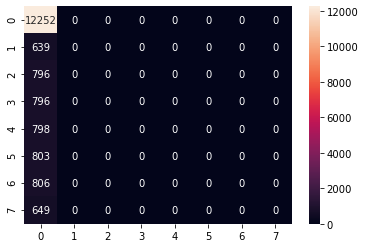

In [32]:
seaborn.heatmap(conf_mat, annot=True, fmt="d")

**Trying different approaches**

In [33]:
X=df.drop(['class'], axis=1)
y=df['class']

In [34]:
X_str = to_str(X)

In [35]:
X_v = vectorizer.fit_transform(X_str)

In [36]:
X_v.shape

(50102, 1259229)

In [37]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(solver='lbfgs', max_iter=400),
]

In [38]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_v, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

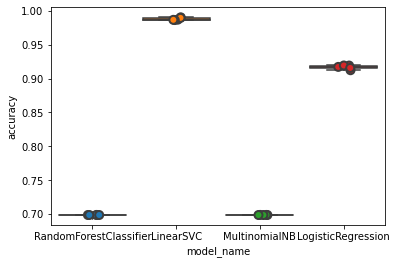

In [39]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.987945
LogisticRegression        0.916710
MultinomialNB             0.698655
RandomForestClassifier    0.698635
Name: accuracy, dtype: float64

[tutorial](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f)

> Going with linear SVC as it performed better than the rest

In [41]:
model = LinearSVC()

In [42]:
model.fit(X_train_v, y_train)

LinearSVC()

In [43]:
y_pred = model.predict(X_test_v)

In [44]:
conf_mat = confusion_matrix(y_test, y_pred)

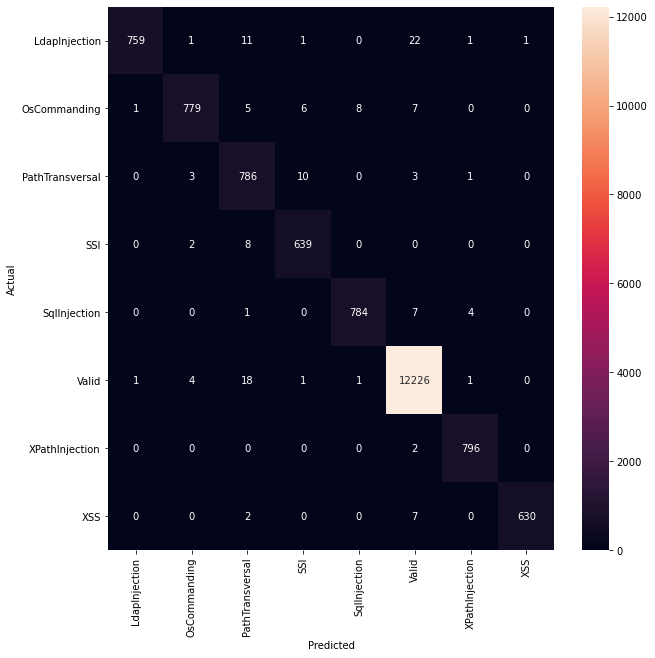

In [45]:
import seaborn as sns
labels = sorted(classes)
# print(classes, " labels ", labels)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
# y_pred = model.predict_proba(X_test_v)
clf = CalibratedClassifierCV(model)
clf.fit(X_train_v, y_train)
y_proba = clf.predict_proba(X_test_v)

NameError: name 'CalibratedClassifierCV' is not defined

In [47]:
y_proba.shape
y_proba[0]

NameError: name 'y_proba' is not defined

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(y_proba)
# print(le.classes_, " y_test.shape ", y_test.shape, " y_pred.shape ", y_proba.shape)
# y_test = le.transform(y_test)
# y_pred = le.transform(y_proba)

print("roc score; ", roc_auc_score(y_test, y_proba, multi_class = 'ovo'))

NameError: name 'y_proba' is not defined

In [49]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names = labels))

                 precision    recall  f1-score   support

  LdapInjection       1.00      0.95      0.97       796
   OsCommanding       0.99      0.97      0.98       806
PathTransversal       0.95      0.98      0.96       803
            SSI       0.97      0.98      0.98       649
   SqlInjection       0.99      0.98      0.99       796
          Valid       1.00      1.00      1.00     12252
 XPathInjection       0.99      1.00      0.99       798
            XSS       1.00      0.99      0.99       639

       accuracy                           0.99     17539
      macro avg       0.98      0.98      0.98     17539
   weighted avg       0.99      0.99      0.99     17539



# Saving the Model and Vectorizer

In [50]:
from joblib import dump, load
dump(model, 'linear_svc_model_v2.joblib')

['linear_svc_model_v2.joblib']

In [51]:
vectorizer.fit_transform(X_train_str)

<32563x890038 sparse matrix of type '<class 'numpy.float64'>'
	with 3443249 stored elements in Compressed Sparse Row format>

In [52]:
dump(vectorizer, 'vectorizer_v3.joblib')

['vectorizer_v3.joblib']